In [118]:
using Revise
using Bilevel

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using ForwardDiff
using Plots
using BenchmarkTools
using LinearAlgebra

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), [0.,0.,0.])
normal = FreeVector3D(default_frame(floor), [0.,0.,1.])
floor_obs = Obstacle(floor, point, normal, :xyz, .5)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)
ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)

MechanismState{Float64, Float64, Float64, …}(…)

# Simulation

In [83]:
q1 = [1., 0., 0., 0., 0., 0., 0.015]
v1 = [0., 0., 0., 1., 0., 0.]
N = 25
# q1 = [1., 0., 0., 0., 0., 0., 0.]
# v1 = [0., 0., 0., 1., 0., 0.]
# N = 10
Δt = .01

sim_data_indirect = get_sim_data_indirect(mechanism,env,Δt,relax_comp=true)
sim_data_direct = get_sim_data_direct(mechanism,env,Δt,relax_comp=true)
set_configuration!(x0, q1)
set_velocity!(x0, v1)

In [97]:
traj_indirect = Bilevel.simulate(sim_data_indirect, ctrl!, x0, N, verbose=1)

Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished s

(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015], [1.0, 0.0, 1.6023e-10, -6.91471e-25, 0.01, -1.37325e-26, 0.014019], [1.0, 0.0, 4.95169e-10, -6.91471e-25, 0.02, -1.37325e-26, 0.012057], [1.0, 0.0, 1.03103e-9, -6.91471e-25, 0.03, -1.37325e-26, 0.009114], [1.0, 0.0, 1.83026e-9, -6.91471e-25, 0.04, -1.37325e-26, 0.00519], [1.0, 0.0, 3.08969e-9, -6.91471e-25, 0.05, -1.37325e-26, 0.000285], [1.0, -8.84091e-21, 4.34912e-9, -1.20702e-20, 0.0571995, 1.72674e-23, 4.09255e-8], [1.0, -8.84091e-21, 0.000408893, -1.20702e-20, 0.0637655, 1.72674e-23, -6.81881e-15], [0.999999, -8.84091e-21, 0.000829181, -1.20702e-20, 0.0698408, 1.72674e-23, -6.81881e-15], [0.999999, -8.84091e-21, 0.00124931, -1.20702e-20, 0.0754252, 1.72674e-23, 6.81881e-15]  …  [0.999992, -8.84091e-21, 0.00376714, -1.20702e-20, 0.0986266, 1.72673e-23, 6.81881e-15], [0.99999, -8.84091e-21, 0.0041863, -1.20702e-20, 0.100776, 1.72672e-23, -6.81881e-15], [0.999988, -8.84091e-21, 0.00460532, -1.20703e-20, 0.102435, 1.72671e-23, 6.81881e-15], 

In [98]:
traj_direct = Bilevel.simulate(sim_data_direct, ctrl!, x0, N, verbose=1)

Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished s

(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015], [1.0, 0.0, 4.90389e-6, 0.0, 0.01, 4.90385e-21, 0.014019], [1.0, 0.0, 1.4711e-5, 0.0, 0.02, 4.90385e-21, 0.012057], [1.0, 0.0, 2.94207e-5, 0.0, 0.0300001, -4.66692e-21, 0.009114], [1.0, 0.0, 4.90322e-5, 0.0, 0.0400002, -4.66692e-21, 0.00519], [1.0, 0.0, 7.35446e-5, 0.0, 0.0500003, -9.13515e-22, 0.000285], [1.0, 7.57808e-15, 6.77876e-5, -3.61015e-14, 0.0572, -2.7174e-16, 2.60496e-9], [1.0, 7.57808e-15, 0.000566665, -3.61015e-14, 0.0637661, -2.15879e-13, -6.84345e-16], [0.999999, 7.57808e-15, 0.00107475, -3.61015e-14, 0.0698414, -2.15879e-13, -6.84345e-16], [0.999998, 7.57808e-15, 0.00158272, -3.80261e-14, 0.0754257, -2.15902e-13, 6.84345e-16]  …  [0.999988, 7.57802e-15, 0.00462886, -2.09439e-14, 0.0986257, -2.1571e-13, 6.84345e-16], [0.999986, 7.57802e-15, 0.00513627, -2.09399e-14, 0.100775, -2.1571e-13, -3.21794e-11], [0.999983, 7.57802e-15, 0.0056436, -2.09391e-14, 0.102433, -2.1571e-13, 0.0], [0.99998, 7.57802e-15, 0.00615086, -2.09368e-14, 

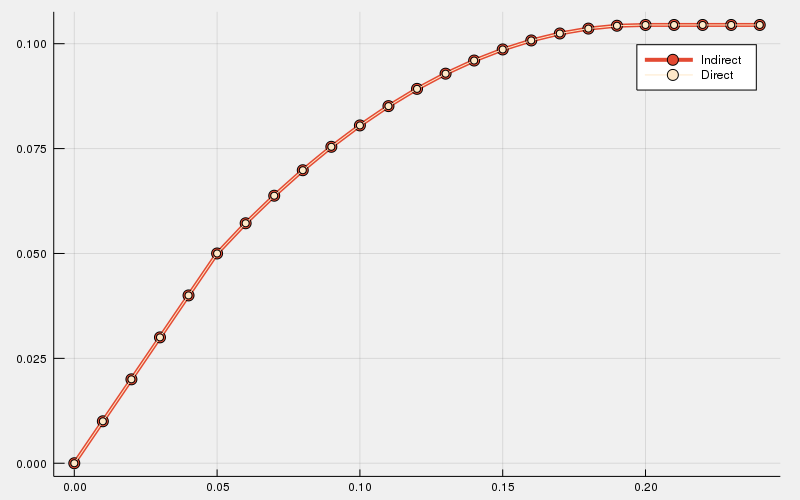

In [99]:
j = 5
clibrary(:Plots)
gr(size=(800,500), html_output_format=:png, 
    seriescolor=:magma,  background_color_legend=:white, 
    background=RGB(((240,240,240) ./ 255.)...));
plot(traj_indirect[6],traj_indirect[7][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_direct[6],traj_direct[7][j,:],label="Direct",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

In [ ]:
@benchmark Bilevel.simulate(sim_data_indirect, ctrl!, x0, N)

In [ ]:
@benchmark Bilevel.simulate(sim_data_direct, ctrl!, x0, N)

# Tuning Lower Solver

In [ ]:
# tuning the lower level solver
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 0., 0.1, 0.]
u0 = zeros(6)
eval_cons = generate_solver_fn_sim_direct(sim_data,q0,v0,u0)
sim_data.lower_options["num_fosteps"] = 3
sim_data.lower_options["num_sosteps"] = 2
sim_data.lower_options["c"] = 1.
sim_data.lower_options["c_fos"] = 10.
sim_data.lower_options["c_sos"] = 10.
x = vcat(q0,v0,[1.])
eval_cons(x);

# Trajectory Optimization

In [113]:
q1 = [1., 0., 0., 0., 0., 0., 0.]
qN = [1., 0., 0., 0., .105, 0., 0.]
N = 10
Δt = .01

0.01

In [38]:
sim_data_indirect = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=true)

# adding user defined constraint
vs = sim_data_indirect.vs
add_eq!(sim_data_indirect, :cq1, length(q1), x -> vs(x, :q1) - q1)
add_eq!(sim_data_indirect, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)
for n=1:N-1
    add_eq!(sim_data_indirect, Symbol("cu", n), 6, x -> vs(x, Symbol("u", n)))
end

In [39]:
traj_indirect = Bilevel.trajopt(sim_data_indirect, quaternion_state=true, verbose=1)

Finished successfully: optimality conditions satisfied


(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, -4.52167e-10, -9.19452e-7, -3.37263e-12, 0.0111111, 1.18547e-12, 0.003924], [1.0, 5.46487e-10, -1.83886e-6, 1.84332e-11, 0.0222222, -2.24383e-13, 0.006867], [1.0, 2.34681e-10, -2.7583e-6, 1.27126e-11, 0.0333333, -2.89012e-13, 0.008829], [1.0, 3.61499e-11, -3.67773e-6, 1.25678e-11, 0.0444444, 3.58791e-14, 0.00981], [1.0, 2.06382e-10, -2.94219e-6, 4.06409e-12, 0.0555555, 2.67772e-14, 0.00981], [1.0, 1.86474e-10, -2.20664e-6, 4.97379e-12, 0.0666667, 3.39623e-13, 0.008829], [1.0, 8.358e-11, -1.4711e-6, 7.36087e-12, 0.0777778, 4.83583e-13, 0.006867], [1.0, 5.57503e-10, -7.35548e-7, -3.5473e-12, 0.0888889, -3.03948e-13, 0.003924], [1.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0]], Any[[-9.04317e-8, -0.00018389, 1.47616e-9, 1.11111, 3.95104e-11, 0.4905], [-9.0433e-8, -0.00018389, -6.74526e-10, 1.11111, -2.19137e-10, 0.392398], [1.99731e-7, -0.000183882, 4.32713e-9, 1.11111, 2.13363e-10, 0.294296], [-6.2363e-8, -0.000183888, -1.11668e-9, 1.11111, 5.73742e-11,

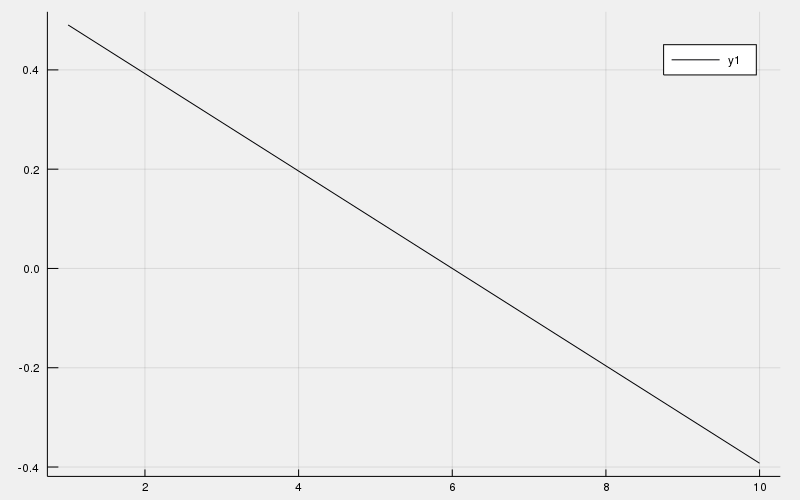

In [48]:
plot(traj_indirect[7][13,:])

In [41]:
traj_indirect[3]

9-element Array{Any,1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [114]:
sim_data_direct = get_trajopt_data_direct(mechanism,env,Δt,N,relax_comp=true)

# adding user defined constraint
vs = sim_data_direct.vs
add_eq!(sim_data_direct, :cq1, length(q1), x -> vs(x, :q1) - q1)
add_eq!(sim_data_direct, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)
for n=1:N-1
    add_eq!(sim_data_direct, Symbol("cu", n), 6, x -> vs(x, Symbol("u", n)))
end

In [117]:
traj_direct = Bilevel.trajopt(sim_data_direct, quaternion_state=true, verbose=1)

LAPACKException: LAPACKException(13)

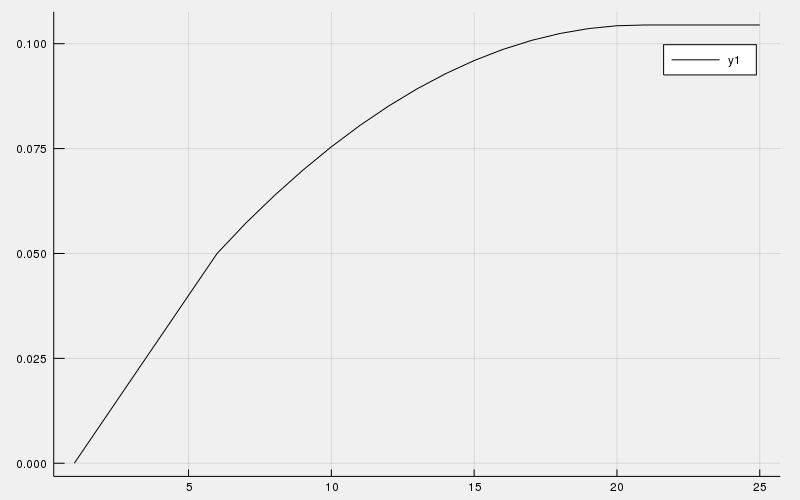

In [111]:
plot(traj_indirect[7][5,:])

In [112]:
traj_indirect[7][5,end]

0.10446660994126772

# Little Dog

In [171]:
urdf = joinpath("..", "urdf", "little_dog", "little_dog.urdf")
mechanism = parse_urdf(Float64, urdf)

Spanning tree:
Vertex: world (root)
  Vertex: floor, Edge: floor_to_world
    Vertex: body, Edge: floor_to_body
      Vertex: front_left_hip, Edge: front_left_hip_roll
        Vertex: front_left_upper_leg, Edge: front_left_hip_pitch
          Vertex: front_left_lower_leg, Edge: front_left_knee
      Vertex: front_right_hip, Edge: front_right_hip_roll
        Vertex: front_right_upper_leg, Edge: front_right_hip_pitch
          Vertex: front_right_lower_leg, Edge: front_right_knee
      Vertex: back_left_hip, Edge: back_left_hip_roll
        Vertex: back_left_upper_leg, Edge: back_left_hip_pitch
          Vertex: back_left_lower_leg, Edge: back_left_knee
      Vertex: back_right_hip, Edge: back_right_hip_roll
        Vertex: back_right_upper_leg, Edge: back_right_hip_pitch
          Vertex: back_right_lower_leg, Edge: back_right_knee
No non-tree joints.

In [172]:
mvis = MechanismVisualizer(mechanism, URDFVisuals(urdf, package_path=[joinpath(Pkg.dir("Bilevel"),"urdf","little_dog")]))

  likely near /Users/blandry/.julia/packages/IJulia/9ajf8/src/kernel.jl:52
┌ Warning: `Pkg.dir(pkgname, paths...)` is deprecated; instead, do `import Bilevel; joinpath(dirname(pathof(Bilevel)), "..", paths...)`.
└ @ Pkg.API /Users/osx/buildbot/slave/package_osx64/build/usr/share/julia/stdlib/v0.7/Pkg/src/API.jl:454


MechanismVisualizer{MechanismState{Float64,Float64,Float64,TypeSortedCollections.TypeSortedCollection{Tuple{Array{Joint{Float64,Fixed{Float64}},1},Array{Joint{Float64,QuaternionFloating{Float64}},1},Array{Joint{Float64,Revolute{Float64}},1}},3}},Visualizer}(MechanismState{Float64, Float64, Float64, …}(…), MeshCat Visualizer with path /meshcat, 14)

In [173]:
open(mvis)

┌ Info: Serving MeshCat visualizer at http://127.0.0.1:8712
└ @ MeshCat /Users/blandry/.julia/packages/MeshCat/jt9Xz/src/servers.jl:7
┌ Info: Listening on: Sockets.InetAddr{Sockets.IPv4}(ip"127.0.0.1", 0x2208)
└ @ HTTP.Servers /Users/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:301


Process(`open http://127.0.0.1:8712`, ProcessExited(0))

┌ Info: Accept (0):  🔗    0↑     0↓    0s 127.0.0.1:8712:8712 ≣16
└ @ HTTP.Servers /Users/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Info: Accept (1):  🔗    0↑     0↓    0s 127.0.0.1:8712:8712 ≣16
└ @ HTTP.Servers /Users/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Info: Accept (2):  🔗    0↑     0↓    0s 127.0.0.1:8712:8712 ≣16
└ @ HTTP.Servers /Users/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
Error handling websocket connection:
WebSockets.WebSocketClosedError("ws|server respond to OPCODE_CLOSE 1001:Going Away")┌ Info: Closed (2):  💀    1↑     1↓🔒 148s 127.0.0.1:8711:8711 ≣16
└ @ HTTP.Servers /Users/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351


In [174]:
widget = manipulate!(mvis)

Widgets.Widget{:rbd_manipulator,Any}(OrderedCollections.OrderedDict{Symbol,Any}(:floor_to_world=>Widget{:rbd_joint,Any}(OrderedCollections.OrderedDict{Symbol,Any}(), Observable{Any} with 1 listeners. Value:
nothing, nothing, defaultlayout),:floor_to_body=>Widget{:rbd_joint,Any}(OrderedCollections.OrderedDict{Symbol,Any}(:rw=>Widget{:slider,Float64}(OrderedCollections.OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
200,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["-1.0", "-0.98995", "-0.979899", "-0.969849", "-0.959799", "-0.949749", "-0.939698", "-0.929648", "-0.919598", "-0.909548"  …  "0.909548", "0.919598", "0.929648", "0.939698", "0.949749", "0.959799", "0.969849", "0.979899", "0.98995", "1.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"1.0",:value=>Observable{Float64} with 2 listeners. Value:
1.0), Observable{Float64} with 2 listeners. Value:
1.0, Scope("knockout-component-72ef889b-6efa-41fd-bcad-aaaae3e33b90", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["floor_to_body.rw"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>200,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["-1.0", "-0.98995", "-0.979899", "-0.969849", "-0.959799", "-0.949749", "-0.939698", "-0.929648", "-0.919598", "-0.909548"  …  "0.909548", "0.919598", "0.929648", "0.939698", "0.949749", "0.959799", "0.969849", "0.979899", "0.98995", "1.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"1.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
200, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/blandry/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/blandry/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/blandry/.julia/packages/InteractBase/3SqBl/src/../assets/style.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0